In [1]:
#Introduction to optimisation
#Unconstrained methods - Lecture 9

using Plots, LaTeXStrings, LinearAlgebra
using ForwardDiff

# Graphical backend
pyplot(size=(600,300))

# Line search: bisection method
function bisection(f,a,b)
    l = 1e-6
    bᵢ = b
    aᵢ = a

    λ = 0
    while bᵢ - aᵢ > l
        λ = (aᵢ + bᵢ)/2
        ∇f= ForwardDiff.derivative(f,λ)
        if abs(∇f) == 0 # equivalent to ∇f = 0
            return λ
        elseif ∇f > 0   # left move
            aᵢ₊₁ = aᵢ
            bᵢ₊₁ = λ
        else            # move right
            aᵢ₊₁ = λ
            bᵢ₊₁ = bᵢ
        end
        aᵢ = aᵢ₊₁
        bᵢ = bᵢ₊₁
    end
        return λ
end

bisection (generic function with 1 method)

In [2]:
# Method 1: gradient descent
function gradient(f, x₀, λ₀ = :auto, show_steps = false, ϵ = 1e-6, M = 1001)
    ∇(f,x)  = ForwardDiff.gradient(f, x)
    n = length(x₀)  # dimension of the problem
    xg = zeros(n,M) # store step history
    xg[:,1] = x₀    # initial point

    println("Starting gradient descent...")
    tini = time(); # Start stopwatch
    for k = 1:M-1
        d = -∇(f,xg[:,k])         
        if norm(∇(f,xg[:,k])) < ϵ # stop criteria on the norm of ∇f(x)
             xg = xg[:,1:k]
             break
        end
        
        # Line search according to selected method
        if λ₀ == :auto 
            ls(λ) = f(xg[:,k] + λ*d)     # state line search (ls) function
            λbar = bisection(ls, 0, 10)  # to be on the safe side, we use b=10.   
        else
            λbar = λ₀
        end
        
        xg[:,k+1] = xg[:,k] + λbar*d
            
        if show_steps
            println(" iter=", k, " λ=", round(λbar, sigdigits = 4), " xᵏ=", round.(xg[:,k+1], sigdigits = 4))
        end    
    end

    # Log information    
    tend = time() - tini # Stop stopwatch
    println("Gradient descent converged.")
    println(" Total steps: ", size(xg, 2) - 1)
    println(" Total time (s): ", round(tend, sigdigits = 4))
    println(" Sol. found: ", round.(xg[:,end], sigdigits = 4), 
        "/ Opt. value: ", round(f(xg[:,end]), sigdigits = 4), "\n")
    
    return xg
end

gradient (generic function with 5 methods)

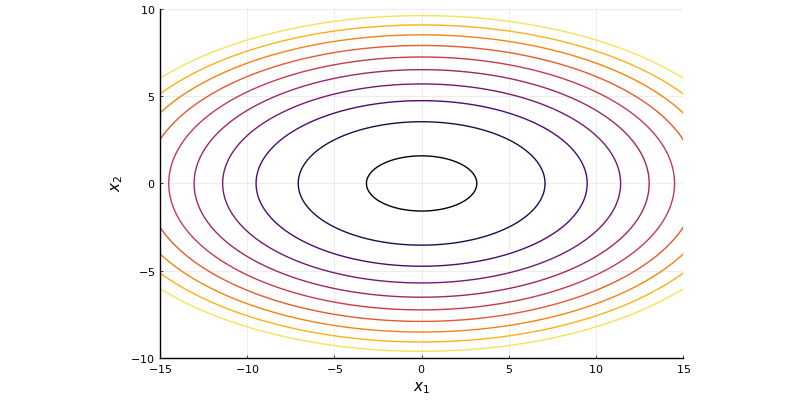

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [3]:
# function to be optimised
f(x) = 0.5x[1]^2 + 2x[2]^2 

# Plotting the contours of the function to be optimised
n = 1000
x = range(-20,stop=20,length=n);
y = range(-20,stop=20,length=n);
z = [f([x[i],y[j]]) for j = 1:n, i = 1:n];

contour(x,y,z,
        levels = [ 5 + 20(i-1) for i=1:10],
        xaxis = (L"$x_1$", (-15,15)),
        yaxis = (L"$x_2$", (-10,10)),
        clims = (0,200),
        #clabels = true,
        colorbar = false,
        aspect_ratio = :equal)

In [4]:
x₀ = [9, 5] # starting point

xg_opt = gradient(f, x₀, :auto, true);

Starting gradient descent...
 iter=1 λ=0.2861 xᵏ=[6.425, -0.7228]
 iter=2 λ=0.6644 xᵏ=[2.156, 1.198]
 iter=3 λ=0.2861 xᵏ=[1.539, -0.1732]
 iter=4 λ=0.6644 xᵏ=[0.5167, 0.287]
 iter=5 λ=0.2861 xᵏ=[0.3688, -0.04149]
 iter=6 λ=0.6644 xᵏ=[0.1238, 0.06877]
 iter=7 λ=0.2861 xᵏ=[0.08837, -0.009941]
 iter=8 λ=0.6644 xᵏ=[0.02966, 0.01648]
 iter=9 λ=0.2861 xᵏ=[0.02117, -0.002382]
 iter=10 λ=0.6644 xᵏ=[0.007106, 0.003948]
 iter=11 λ=0.2861 xᵏ=[0.005073, -0.0005706]
 iter=12 λ=0.6644 xᵏ=[0.001702, 0.0009458]
 iter=13 λ=0.2861 xᵏ=[0.001215, -0.0001367]
 iter=14 λ=0.6644 xᵏ=[0.0004079, 0.0002266]
 iter=15 λ=0.2861 xᵏ=[0.0002912, -3.276e-5]
 iter=16 λ=0.6644 xᵏ=[9.773e-5, 5.43e-5]
 iter=17 λ=0.2861 xᵏ=[6.977e-5, -7.849e-6]
 iter=18 λ=0.6644 xᵏ=[2.342e-5, 1.301e-5]
 iter=19 λ=0.2861 xᵏ=[1.672e-5, -1.881e-6]
 iter=20 λ=0.6644 xᵏ=[5.61e-6, 3.117e-6]
 iter=21 λ=0.2861 xᵏ=[4.005e-6, -4.506e-7]
 iter=22 λ=0.6644 xᵏ=[1.344e-6, 7.468e-7]
 iter=23 λ=0.2861 xᵏ=[9.596e-7, -1.079e-7]
 iter=24 λ=0.6644 xᵏ=[3.221e-

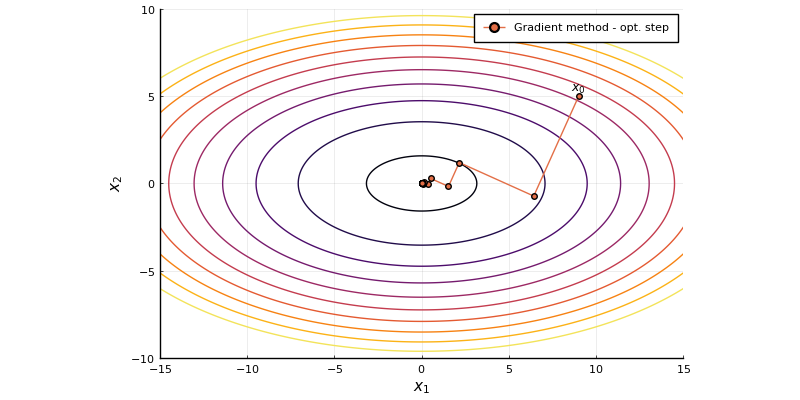

In [5]:
#Plotting progress gradient descent
plot!( xg_opt[1,:], xg_opt[2,:],label = "Gradient method - opt. step", marker=:circle)
annotate!([(x₀[1], x₀[2], text(L"x_0",9,:bottom))])

#savefig("gradient1.pdf")

In [6]:
xg_fix1 = gradient(f, x₀, 0.2, true);

Starting gradient descent...
 iter=1 λ=0.2 xᵏ=[7.2, 1.0]
 iter=2 λ=0.2 xᵏ=[5.76, 0.2]
 iter=3 λ=0.2 xᵏ=[4.608, 0.04]
 iter=4 λ=0.2 xᵏ=[3.686, 0.008]
 iter=5 λ=0.2 xᵏ=[2.949, 0.0016]
 iter=6 λ=0.2 xᵏ=[2.359, 0.00032]
 iter=7 λ=0.2 xᵏ=[1.887, 6.4e-5]
 iter=8 λ=0.2 xᵏ=[1.51, 1.28e-5]
 iter=9 λ=0.2 xᵏ=[1.208, 2.56e-6]
 iter=10 λ=0.2 xᵏ=[0.9664, 5.12e-7]
 iter=11 λ=0.2 xᵏ=[0.7731, 1.024e-7]
 iter=12 λ=0.2 xᵏ=[0.6185, 2.048e-8]
 iter=13 λ=0.2 xᵏ=[0.4948, 4.096e-9]
 iter=14 λ=0.2 xᵏ=[0.3958, 8.192e-10]
 iter=15 λ=0.2 xᵏ=[0.3167, 1.638e-10]
 iter=16 λ=0.2 xᵏ=[0.2533, 3.277e-11]
 iter=17 λ=0.2 xᵏ=[0.2027, 6.554e-12]
 iter=18 λ=0.2 xᵏ=[0.1621, 1.311e-12]
 iter=19 λ=0.2 xᵏ=[0.1297, 2.621e-13]
 iter=20 λ=0.2 xᵏ=[0.1038, 5.243e-14]
 iter=21 λ=0.2 xᵏ=[0.08301, 1.049e-14]
 iter=22 λ=0.2 xᵏ=[0.06641, 2.097e-15]
 iter=23 λ=0.2 xᵏ=[0.05313, 4.194e-16]
 iter=24 λ=0.2 xᵏ=[0.0425, 8.389e-17]
 iter=25 λ=0.2 xᵏ=[0.034, 1.678e-17]
 iter=26 λ=0.2 xᵏ=[0.0272, 3.355e-18]
 iter=27 λ=0.2 xᵏ=[0.02176, 6.711e-19]
 i

In [7]:
xg_fix2 = gradient(f, x₀, 0.4);

Starting gradient descent...
Gradient descent converged.
 Total steps: 34
 Total time (s): 0.000222
 Sol. found: [2.579e-7, 1.433e-7]/ Opt. value: 7.429e-14



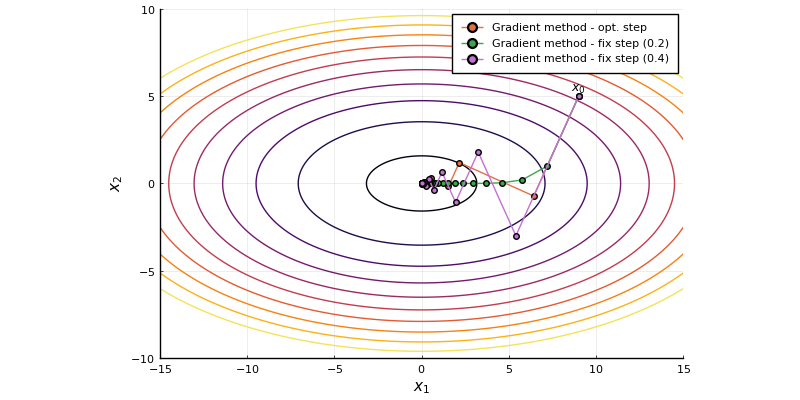

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [8]:
plot!( xg_fix1[1,:], xg_fix1[2,:],label = "Gradient method - fix step (0.2)", marker=:circle)
#savefig("gradient2.pdf")

plot!( xg_fix2[1,:], xg_fix2[2,:],label = "Gradient method - fix step (0.4)", marker=:circle)
#savefig("gradient3.pdf")

Starting gradient descent...
Gradient descent converged.
 Total steps: 1000
 Total time (s): 0.003724
 Sol. found: [8.399000000000001e-301, 5.0]/ Opt. value: 50.0



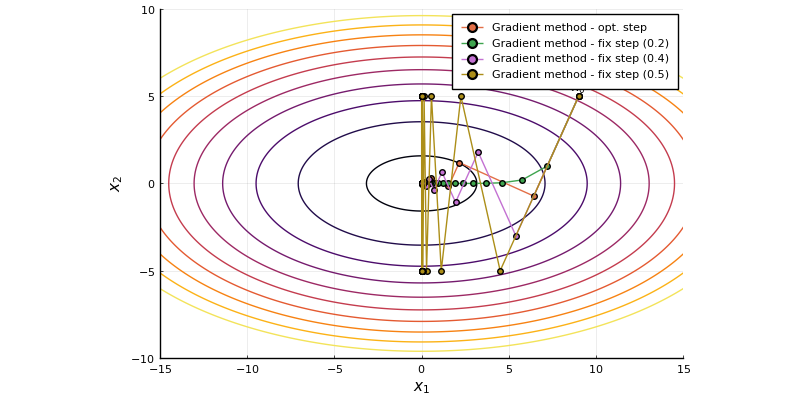

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [9]:
xg_fix3 = gradient(f, x₀, 0.5);
plot!( xg_fix3[1,:], xg_fix3[2,:],label = "Gradient method - fix step (0.5)", marker=:circle)

In [10]:
# Method 2: Newton's method
function newton(f, x₀, λ₀ = :auto, show_steps = false, ϵ = 1e-6, M = 101)
    ∇(f,x) = ForwardDiff.gradient(f, x)
    H(f,x) = ForwardDiff.hessian(f, x)
    
    n = length(x₀)
    xn = zeros(n,M) # store step history
    xn[:,1] = x₀ # initial point

    println("Starting Newton's method...")
    tini = time(); # Start stopwatch
    for k = 1:M-1
        d = H(f,xn[:,k]) \ -∇(f,xn[:,k]) # using backslash operator instead of inverse
        # stop criteria on the norm of ∇f(x)
        if norm(d) < ϵ
             xn= xn[:,1:k]
             break
        end
        #state line search (ls) function
        ls(λ) = f(xn[:,k] + λ*d)

        # Line search according to selected method
        if λ₀ == :auto
            λbar = bisection(ls, 0, 50)
        else
            λbar = λ₀
        end
        
        xn[:,k+1] = xn[:,k] + λbar*d
        
        if show_steps
            println("iter.=", k, " λ=", round(λbar, sigdigits = 4), "xᵏ=", round.(xn[:,k+1], sigdigits=4))
        end    
    end
    # Log information
    tend = time() - tini; # Stop stopwatch
    println("Newton's method converged.")
    println(" Total steps: ", size(xn,2)-1)
    println(" Total time (s): ", round(tend, sigdigits = 4))
    println(" Sol. found: ", round.(xn[:,end] ,sigdigits = 4), 
        "/ Opt. value: ", round(f(xn[:,end]) ,sigdigits = 4), "\n")
    
    return xn
end

newton (generic function with 5 methods)

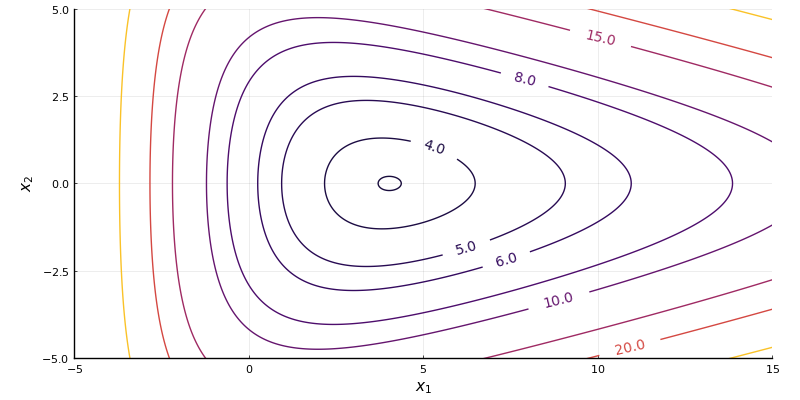

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [11]:
# function to be optimised
f(x) = exp(-(x[1]-3)/2) + exp((4x[2] + x[1])/10) + exp((-4x[2] + x[1])/10)


# Plotting the contours of the function to be optimised
n = 1000
x = range(-10,stop = 25, length = n);
y = range(-10,stop = 10, length = n);
z = [f([x[i],y[j]]) for j = 1:n, i = 1:n];

contour(x,y,z,
        levels = [3.6, 4, 5, 6 , 8, 10, 15, 20, 30],
        xaxis = (L"$x_1$", (-5,15)),
        yaxis = (L"$x_2$", (-5,5)),
        clims = (0,35),
        clabels = true,
        colorbar = false,
        aspect_ratio = :equal)

In [12]:
x₀ = [10;-4.5] # starting point
xn = newton(f, x₀, 1);

Starting Newton's method...
Newton's method converged.
 Total steps: 5
 Total time (s): 1.707
 Sol. found: [4.027, -2.361e-7]/ Opt. value: 3.59



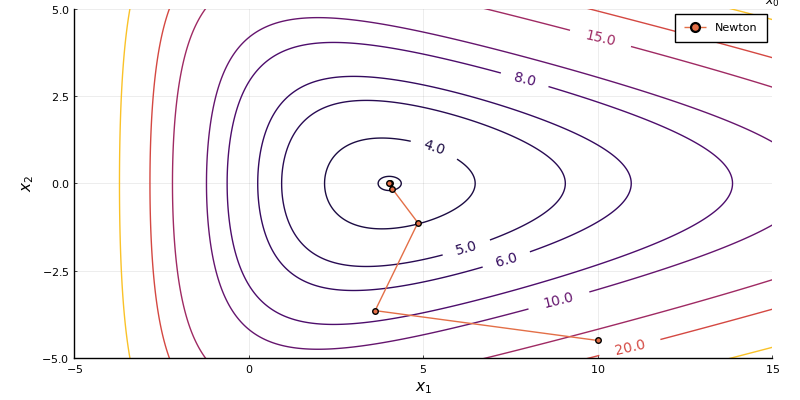

In [13]:
plot!(xn[1,:], xn[2,:],label = "Newton", marker=:circle)
annotate!([(15, 5, text(L"x_0",9,:bottom))])

#savefig("newton1.pdf")

In [14]:
xg = gradient(f, x₀,:auto, true);

Starting gradient descent...
 iter=1 λ=0.7275 xᵏ=[8.782, 0.1543]
 iter=2 λ=9.021 xᵏ=[4.682, -0.9185]
 iter=3 λ=1.987 xᵏ=[4.433, 0.03534]
 iter=4 λ=5.403 xᵏ=[4.069, -0.05984]
 iter=5 λ=2.166 xᵏ=[4.053, 0.002483]
 iter=6 λ=5.056 xᵏ=[4.03, -0.003542]
 iter=7 λ=2.176 xᵏ=[4.029, 0.0001478]
 iter=8 λ=5.035 xᵏ=[4.027, -0.0002084]
 iter=9 λ=2.176 xᵏ=[4.027, 8.696e-6]
 iter=10 λ=5.033 xᵏ=[4.027, -1.226e-5]
 iter=11 λ=2.176 xᵏ=[4.027, 5.114e-7]
Gradient descent converged.
 Total steps: 11
 Total time (s): 0.02457
 Sol. found: [4.027, 5.114e-7]/ Opt. value: 3.59



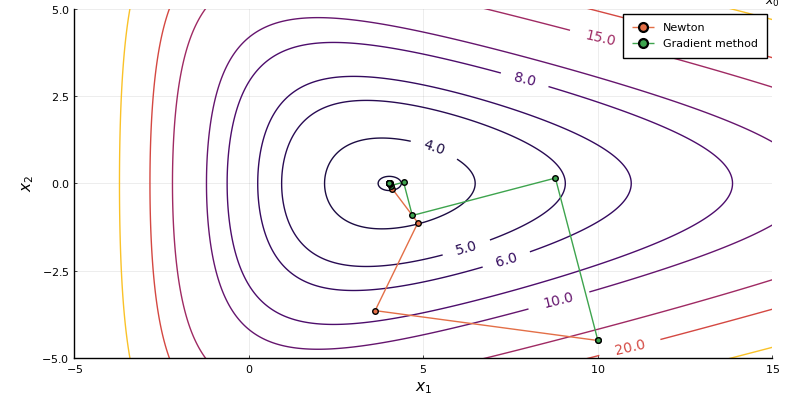

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [15]:
#Plotting progress gradient descent
plot!( xg[1,:], xg[2,:],label = "Gradient method", marker=:circle)

#savefig("newton2.pdf")

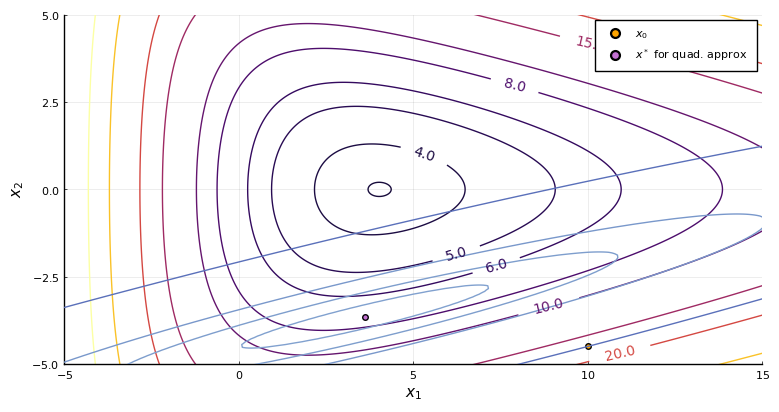

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [16]:
# function to be optimised
f(x) = exp(-(x[1]-3)/2) + exp((4x[2] + x[1])/10) + exp((-4x[2] + x[1])/10)

# Plotting the contours of the function to be optimised
n = 1000
x = range(-10,stop = 25, length = n);
y = range(-10,stop = 10, length = n);
z = [f([x[i],y[j]]) for j = 1:n, i = 1:n];

contour(x,y,z,
        levels = [3.6, 4, 5, 6 , 8, 10, 15, 20, 30, 40],
        xaxis = (L"$x_1$", (-5,15)),
        yaxis = (L"$x_2$", (-5,5)),
        clims = (0,35),
        clabels = true,
        colorbar = false,
        aspect_ratio = :equal
)

x₀ = [10.0, -4.5]
scatter!([x₀[1]], [x₀[2]], color=:orange, label = L"x_0")

∇(f,x) = ForwardDiff.gradient(f, x)
H(f,x) = ForwardDiff.hessian(f, x)

q(x, x₀) = f(x₀) + (x - x₀)'∇(f,x₀) + 0.5(x - x₀)'*H(f,x₀)*(x - x₀)
q2(x) = q(x, x₀)

x = range(-40, 40, length = n);
y = range(-40, 40, length = n);
z = [q2([x[i],y[j]]) for j = 1:n, i = 1:n];

contour!(x, y, z,
        levels = [9, 9.5, 10.5, f(x₀)],
        color = :blues,
        label = L"Quad. approx at $x₀$")

d = H(f, x₀)\ -∇(f,x₀)
x = x₀ + d

scatter!([x[1]], [x[2]], label = L"$x^*$ for quad. approx")
savefig("newton_path1.pdf")

In [17]:
plot!(xn[1,1:2], xn[2,1:2],label = "Newton's method (pure) step 1", marker=:circle)
savefig("newton_path2.pdf")



sys:1: UserWarning: The following kwargs were not used by contour: 'label'


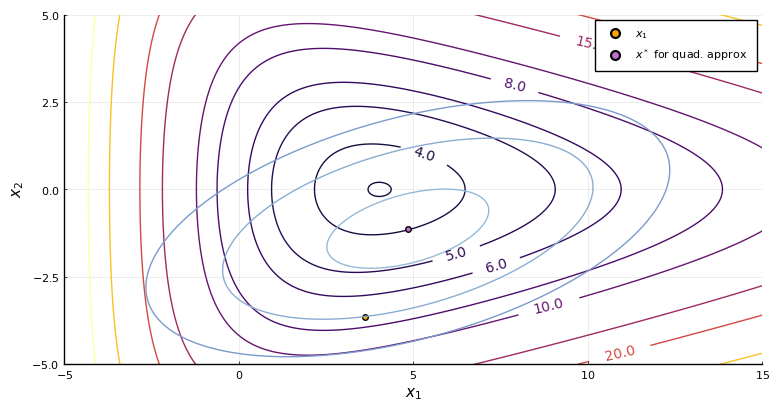

f(x₀) = 7.235910139566675


sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [18]:
# Plotting the contours of the function to be optimised
n = 1000
x = range(-10,stop = 25, length = n);
y = range(-10,stop = 10, length = n);
z = [f([x[i],y[j]]) for j = 1:n, i = 1:n];

contour(x,y,z,
        levels = [3.6, 4, 5, 6 , 8, 10, 15, 20, 30, 40],
        xaxis = (L"$x_1$", (-5,15)),
        yaxis = (L"$x_2$", (-5,5)),
        clims = (0,35),
        clabels = true,
        colorbar = false,
        aspect_ratio = :equal
)

x₀ = [xn[1,2], xn[2,2]]
scatter!([x₀[1]], [x₀[2]], color=:orange, label = L"x_1")

∇(f,x) = ForwardDiff.gradient(f, x)
H(f,x) = ForwardDiff.hessian(f, x)

q(x, x₀) = f(x₀) + (x - x₀)'∇(f,x₀) + 0.5(x - x₀)'*H(f,x₀)*(x - x₀)
q2(x) = q(x, x₀)

x = range(-5, 15, length = n);
y = range(-5, 5, length = n);
z = [q2([x[i],y[j]]) for j = 1:n, i = 1:n];
@show f(x₀)

contour!(x, y, z,
        levels = [5.0, f(x₀), 10.0],
        color = :blues,
        label = L"Quad. approx at $x_1$"
        )

d = H(f, x₀)\ -∇(f,x₀)
x = x₀ + d

scatter!([x[1]], [x[2]], label = L"$x^*$ for quad. approx")

savefig("newton_path3.pdf")

In [19]:
plot!(xn[1,1:3], xn[2,1:3],label = "Newton's method (pure) step 2", marker=:circle)
savefig("newton_path4.pdf")


sys:1: UserWarning: The following kwargs were not used by contour: 'label'


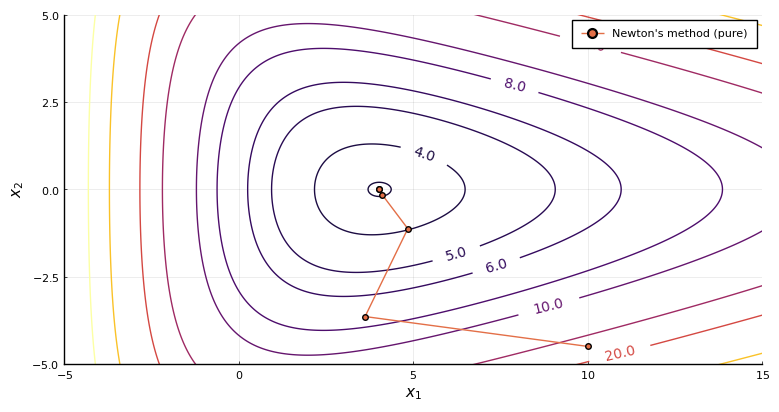

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [20]:
# function to be optimised
f(x) = exp(-(x[1]-3)/2) + exp((4x[2] + x[1])/10) + exp((-4x[2] + x[1])/10)

# Plotting the contours of the function to be optimised
n = 1000
x = range(-10,stop = 25, length = n);
y = range(-10,stop = 10, length = n);
z = [f([x[i],y[j]]) for j = 1:n, i = 1:n];

contour(x,y,z,
        levels = [3.6, 4, 5, 6 , 8, 10, 15, 20, 30, 40],
        xaxis = (L"$x_1$", (-5,15)),
        yaxis = (L"$x_2$", (-5,5)),
        clims = (0,35),
        clabels = true,
        colorbar = false,
        aspect_ratio = :equal
)

x₀ = [10.0, -4.5]

plot!(xn[1,:], xn[2,:],label = "Newton's method (pure)", marker=:circle)
savefig("newton_path5.pdf")

In [21]:
xn_opt = newton(f, x₀, :auto, true)
plot!(xn_opt[1,:], xn_opt[2,:],label = "Newton's method - opt. step", marker=:circle)
savefig("newton_path6.pdf")

Starting Newton's method...
iter.=1 λ=1.232xᵏ=[2.138, -3.445]
iter.=2 λ=1.32xᵏ=[4.308, -0.06239]
iter.=3 λ=0.9562xᵏ=[4.025, -0.004513]
iter.=4 λ=0.9997xᵏ=[4.027, -1.681e-7]
Newton's method converged.
 Total steps: 4
 Total time (s): 0.3143
 Sol. found: [4.027, -1.681e-7]/ Opt. value: 3.59



sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [22]:
# To retireve the actual collors of the theme
# get_color_palette(:auto, plot_color(:white), 17)

In [23]:
f(x) = 2x[1]x[2] + 2x[2] - x[1]^2 - 2x[2]^2
x₀ = [0.5, 0.5]
f(x₀)

gradient(f,x₀,:auto, true, 0.01)

Starting gradient descent...
 iter=1 λ=10.0 xᵏ=[0.5, -9.5]
 iter=2 λ=10.0 xᵏ=[200.5, -419.5]
 iter=3 λ=10.0 xᵏ=[12600.0, -21230.0]
 iter=4 λ=10.0 xᵏ=[689200.0, -1.122e6]
 iter=5 λ=10.0 xᵏ=[3.692e7, -5.98e7]
 iter=6 λ=10.0 xᵏ=[1.971e9, -3.19e9]
 iter=7 λ=10.0 xᵏ=[1.052e11, -1.702e11]
 iter=8 λ=10.0 xᵏ=[5.614e12, -9.084e12]
 iter=9 λ=10.0 xᵏ=[2.996e14, -4.847e14]
 iter=10 λ=10.0 xᵏ=[1.599e16, -2.586e16]
 iter=11 λ=10.0 xᵏ=[8.53e17, -1.38e18]
 iter=12 λ=10.0 xᵏ=[4.552e19, -7.365e19]
 iter=13 λ=10.0 xᵏ=[2.429e21, -3.93e21]
 iter=14 λ=10.0 xᵏ=[1.296e23, -2.097e23]
 iter=15 λ=10.0 xᵏ=[6.916e24, -1.119e25]
 iter=16 λ=10.0 xᵏ=[3.69e26, -5.970999999999999e26]
 iter=17 λ=10.0 xᵏ=[1.969e28, -3.1860000000000003e28]
 iter=18 λ=10.0 xᵏ=[1.051e30, -1.7e30]
 iter=19 λ=10.0 xᵏ=[5.606999999999999e31, -9.072e31]
 iter=20 λ=10.0 xᵏ=[2.992e33, -4.841e33]
 iter=21 λ=10.0 xᵏ=[1.5960000000000001e35, -2.583e35]
 iter=22 λ=10.0 xᵏ=[8.518999999999999e36, -1.378e37]
 iter=23 λ=10.0 xᵏ=[4.546e38, -7.355e38]
 iter=

2×1001 Matrix{Float64}:
 0.5   0.5   200.5   12600.5  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.5  -9.5  -419.5  -21229.5     NaN  NaN  NaN  NaN  NaN  NaN  NaN